In [1]:
import numpy as np
import matplotlib.pyplot as plt

from CCplot import auto_plot_style

In [2]:
auto_plot_style()

In [3]:
def simulate(times, n0, m_bleach, m_recover):
    ns = n0[np.newaxis]
    t_bleaching, t_recovering = np.split(ts, 2)
    for t in t_bleaching[:-1]:
        n0 = ns[-1]
        n  = n0 + m_bleach.dot(n0)[np.newaxis]
        ns = np.append(ns, n, axis=0)
    
    for t in t_recovering:
        n0 = ns[-1]
        n  = n0 + m_recover.dot(n0)[np.newaxis]
        ns = np.append(ns, n, axis=0)
    
    return ns

def plot(ts, ns):
    for label, data in zip("nf nb nc".split(), ns.T):
        plt.plot(ts, data, label=label)

    plt.legend()
    plt.xlabel("Time (a.u.)")
    plt.ylabel("Fraction")

# Model A

$\begin{pmatrix} \dot{n}_f \\ \dot{n}_b \\ \dot{n}_c \end{pmatrix}
=
\begin{pmatrix} 
-\alpha_b & +\alpha_r           & 0 \\
+\alpha_b & -\alpha_r -\alpha_c & 0 \\
        0 &           +\alpha_c & 0
\end{pmatrix}
\cdot
\begin{pmatrix} n_f \\ n_b \\ n_c \end{pmatrix}
$

In [13]:
ts     = np.linspace(0, 1, 1000)
n0     = np.array([1, 0, 0])
alphab = 5e-3
alphar = 7e-3
alphac = 1e-4

mb = np.array([[-alphab,  alphar        , 0],
               [ alphab, -alphar -alphac, 0],
               [      0,  alphac        , 0]])

mr = np.array([[ 0,  alphar        , 0],
               [ 0, -alphar -alphac, 0],
               [ 0,  alphac        , 0]])

ns = simulate(ts, n0, mb, mr)

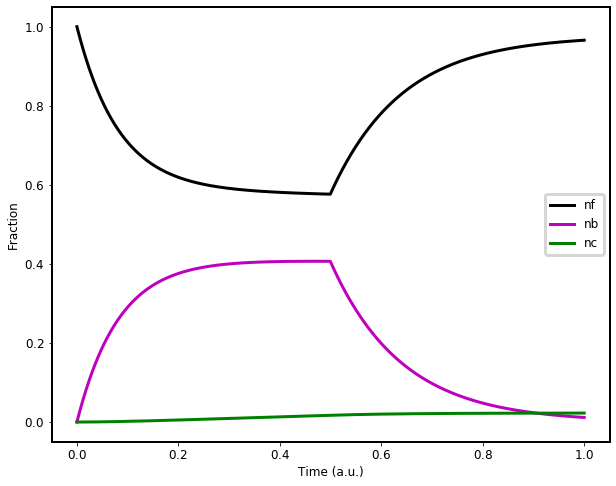

In [14]:
plot(ts, ns)

# Model B

$\begin{pmatrix} \dot{n}_f \\ \dot{n}_b \\ \dot{n}_c \end{pmatrix}
=
\begin{pmatrix} 
-\alpha_b -\alpha_c & +\alpha_r & 0 \\
+\alpha_b           & -\alpha_r & 0 \\
          +\alpha_c &         0 & 0
\end{pmatrix}
\cdot
\begin{pmatrix} n_f \\ n_b \\ n_c \end{pmatrix}
$

In [15]:
ts     = np.linspace(0, 1, 1000)
n0     = np.array([1, 0, 0])
alphab = 5e-3
alphar = 7e-3
alphac = 1e-4

mb = np.array([[-alphab -alphac,  alphar, 0],
               [+alphab        , -alphar, 0],
               [        +alphac,       0, 0]])

mr = np.array([[ -alphac,  alphar, 0],
               [       0, -alphar, 0],
               [ +alphac,       0, 0]])

ns = simulate(ts, n0, mb, mr)

In [16]:
plot(ts, ns)

# Model C

$
\begin{align}
\dot{n}_f &= \alpha n^2 \\
n_f &= \frac{n_0}{1 + n_0 \alpha t}
\end{align}
$

In [32]:
t     = np.linspace(0, 10, 1001)
n0    = 1
alpha = 1.5
n     = n0 / (1 + n0 * alpha * t + n0**2 * alpha**2 * t**2)

In [33]:
plt.plot(t, n)

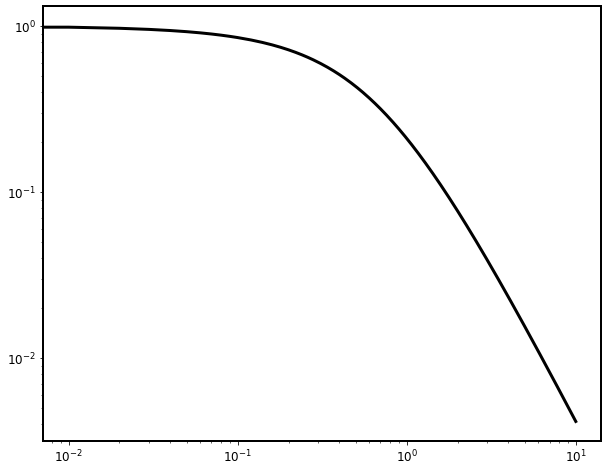

In [34]:
plt.plot(t, n)
plt.xscale("log")
plt.yscale("log")